In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon, Point
from matplotlib.patches import Polygon as MplPolygon

In [7]:
def generate_random_polygon(n_points=5, max_distance=5):
    """
    Generate a smaller random polygon around a random center point.

    Parameters:
    - n_points: Number of points for the polygon.
    - max_distance: Maximum distance from the center point to each polygon point in degrees.
                    This controls the "size" of the polygon.
    """
    # Generate a random center point
    center_lon = np.random.uniform(low=-180, high=180)
    center_lat = np.random.uniform(low=-90, high=90)
    
    # Generate points around this center point within a specified max_distance
    lons = center_lon + np.random.uniform(low=-max_distance, high=max_distance, size=n_points)
    lats = center_lat + np.random.uniform(low=-max_distance, high=max_distance, size=n_points)
    
    # Ensure points stay within valid geographic bounds
    lons = np.clip(lons, -180, 180)
    lats = np.clip(lats, -90, 90)
    
    poly_points = np.vstack((lons, lats)).T
    polygon = Polygon(poly_points).convex_hull
    
    return polygon

def plot_polygon_on_map(polygon, basemap):
    """
    Plot a given polygon on a Basemap object.
    """
    if polygon.geom_type == 'Polygon':
        poly_lons, poly_lats = polygon.exterior.xy
        x, y = basemap(poly_lons, poly_lats)
        ax.add_patch(MplPolygon(np.vstack((x, y)).T, closed=True, edgecolor='r', facecolor='r', alpha=0.4))

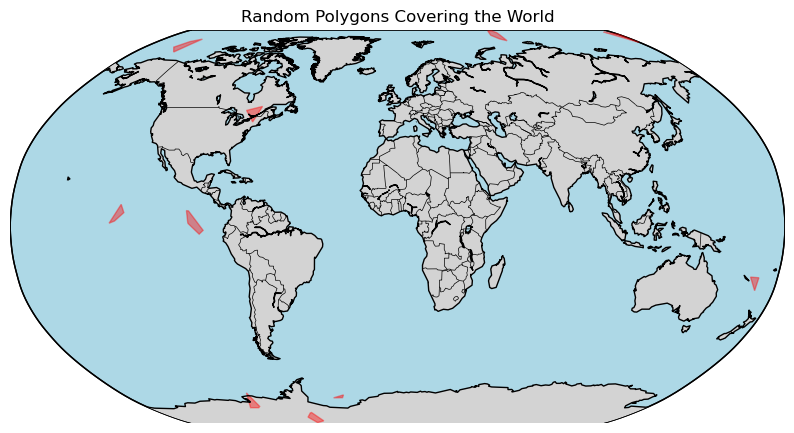

In [8]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
m = Basemap(projection='robin', lon_0=0, resolution='c')

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

# Generate and plot random polygons
for _ in range(10):  # Adjust the range for more or fewer polygons
    rand_poly = generate_random_polygon(n_points=np.random.randint(3, 10))  # Random number of points
    plot_polygon_on_map(rand_poly, m)

plt.title('Random Polygons Covering the World')
plt.show()